**Multivariate Outlier Detection**

We are now going to look at multivariate outlier detection. What we mean by multivariate outlier detection is the use of more than one variable to identify an outlier. In univariate outlier detection we looked for individual outliers in a single variable. These univariate outliers may not show up if there are unusual combinations between 2 or more variables. This is where multivatriate outlier detiection comes in. The same principles as mentioned  in univariate outlier detection can be applied with multivariate outliers. In otherwords don't exclude particular rows of data unless you scientific evidence to support this.</br>
</br>


There are numerous approaches to multivariate outlier detection, some of which are outlined below:


*   Bivariate Charts
> * Based on bivariate Normal assumptions
*   Depth Based control charts (nonparameteric)
> * Map n-dimensional data to one dimension using for example Mahalanobis
> * Build Control Charts for depth

* Mutiscale process control wavelets
> * Detects abnormalities at multiple scales as large wavelett coefficients
> * Useful for data with hetroscedasticity
> * Used in chemical process control

In this section we will specifically focus on the depth based control charts as it is a reasonably reboust process and is quite quick to set-up. The Multiscale process are beyond this material at this stage.

We will need the following three python libaries.

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.DESCR
data = housing.data
target = housing.target
print(housing.feature_names)
x = data
y = target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [2]:
!pip install pyspc
!pip install matplotlib
!pip install spm1d


  Preparing metadata (setup.py) ... done
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30915 sha256=a8b86d396c2b0e541bf412b4fe6172b753859e7c8fefe474c1de73232a744eee
  Stored in directory: /home/ug/orlovsd2/.cache/pip/wheels/42/2e/61/8c14d4c87cdb5204fb33924d00412f42ba06f65fba9157ff7b
Successfully built pyspc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 75.2 MB/s eta 0:00:00


Now lets load the housing housing data that we used in the univariate approach.

In [3]:
#from sklearn.datasets import load_housing


from sklearn.metrics import DistanceMetric as DM
import pandas as pd
housing = data


x = data
y = target
#create the dataframe
housing_df = pd.DataFrame(housing)
#housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
#housing_df['Y']=pd.Series(y)
housing_df


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


We need to be able to calcualte multivariate distances to tells us which points are outliers. This is where were the library [*scipy.spatial*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html)  comes in. This library calculates the Mahalanobis distance and then compares this to values for a hotellings t squared distribution to deterimine if they are outliers. Its like comparing a single univariate variable to a t-distribution. Have a look at this [link](https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution) to understand this better. The code below is an example for the housing dataset of how to calculate the critical Hotellings T Squared value for the dataset. So any values whoes distance is greater than our critical value will be considered outliers.


In [4]:
from scipy.stats import f

x=housing_df.values.tolist()
#print(x))
n=len(x)
k=len(x[0])
vals = f.ppf([0.99], n, k)*(n*k)/((n-k)+1)
print(vals)
rv = f(len(x), len(x[0]))

[38.88768082]


The final piece of code tries to put all this together. We have found our crtical values by calcualting the Hotellings T-Squared from n rows with k columns. We then calcualte the Mahalanobis distance for each row from the overall multivariate mean $\bar{X}$ (xbar). Use this distance with the covariance matrix to calculate individual Hotelling T Squared statistics and  then compare each one to the critical Hotellings T Squared values. You will notice that we have used the covariance matrix to helps us standarised the data using *pandas.cov*. There will be small differences between the chart above and the one below as we do not have the exact calculations from *pyspc* but by using the code below we can identify the outlier points.

In [5]:
from  scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import pandas as pd
#print(housing_df.cov())
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
#print(housing)
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

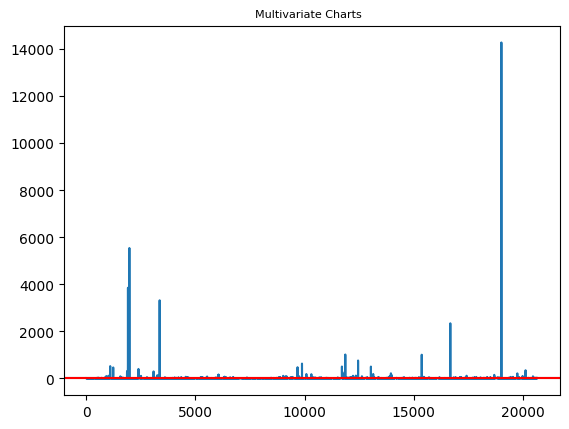

In [6]:
from  scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
#print(housing_df.cov())
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing)
housing.DESCR
data = housing.data
target = housing.target
print(housing.feature_names)
x = data
y = target

inv_cov = pd.DataFrame(np.linalg.pinv(housing_df.cov().values), housing_df.cov().columns, housing_df.cov().index).values.tolist()
x=housing_df.values.tolist()
xbar=housing_df.mean().tolist()

n=len(x)
k=len(x[0])
## Convert f value to hotellings critical value at 1% level
##https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution

Hotvalue = f.ppf([0.99], n, k)*(n*k)/((n-k)+1)
print(Hotvalue)

## calculating hoteling test statistic for each row in housing dataset

for i in range(0,len(x)):

  housing_df.loc[housing_df.index==i,'hotelling']=(n*k)*distance.mahalanobis(x[i], xbar, inv_cov)**2/(k*(n-k))
  housing_df.loc[housing_df.index==i,'critical value']=Hotvalue

x=np.array(housing_df.index.tolist())
y1=np.array(housing_df['hotelling'])
f = plt.figure()

ax = f.add_subplot(111)

plt.plot(x, y1)
plt.axhline(y=housing_df['hotelling'].mean())
plt.axhline(y=Hotvalue,color='r')
#plt.axhline(y=housing_df['hotelling'].mean()+3*housing_df['hotelling'].std(),color='r')
#plt.axhline(y=housing_df['hotelling'].mean()-3*housing_df['hotelling'].std(),color='r')

plt.title('Multivariate Charts  ', fontsize=8)
print(housing_df.loc[housing_df['hotelling']>housing_df['critical value']])

You should be able to use this depth based approach to help you identify multivariate outliers. It is worth looking at this [article](https://onlinelibrary.wiley.com/doi/full/10.1002/cem.2763) from Richard Brereton if you want more detail. The code I have developed above is based on this paper.</br></br>
Finally, play with the data and test out for yourself if you can find or identify new outliers that you may create. Share your conclusions amongst the class.
